<a href="https://colab.research.google.com/github/CamTu22/DAOTHICAMTU20104009/blob/main/Tu%E1%BA%A7n_3_(fuzzy_logic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 7.4 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=46d26db4bc8d29c73c228cc5f78447e3a3e3b929af27ccf2d860e273878fd849
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
x = np.arange(11)
mfx = fuzz.trimf(x,[0,5,10]) #hàm tam giác
x
mfx

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

BÀI TOÁN TIỀN TIP

21.666666666666668


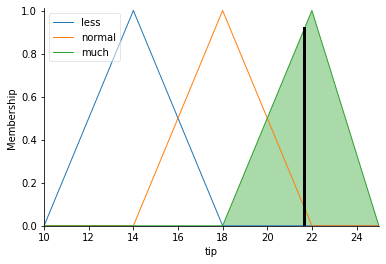

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')#đầu vào
tip = ctrl.Consequent(np.arange(10,26,1),'tip')#đầu ra
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,14,18])
tip['normal'] = fuzz.trimf(tip.universe,[14,18,22])
tip['much'] = fuzz.trimf(tip.universe,[18,22,25])

rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['less'])
rule4 = ctrl.Rule(food['average'] & service['poor'], tip['normal'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule6 = ctrl.Rule(food['average'] & service['good'], tip['normal'])
rule7 = ctrl.Rule(food['good'] & service['average'], tip['much'])
rule8 = ctrl.Rule(food['good'] & service['poor'], tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 10
tipping.input['service'] = 10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)

#service.view() #food['average'].view() trích xuất từng thành phần 
#food.view()
#tip.view()


20.769656952034005


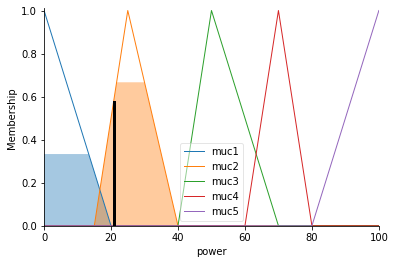

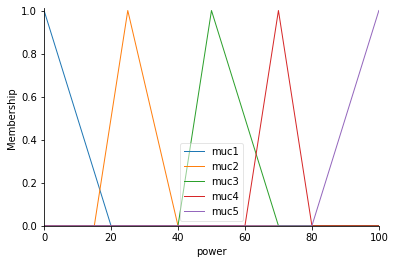

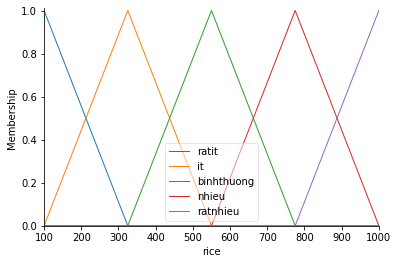

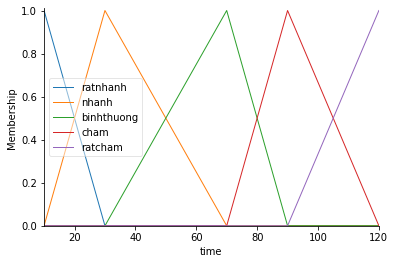

In [ ]:
#BÀI TẬP TRÊN LỚP ( NỒI CƠM ĐIỆN)
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,121,1),'time')
rice = ctrl.Antecedent(np.arange(100,1001,1),'rice')#đầu vào
power = ctrl.Consequent(np.arange(0,101,1),'power')#đầu ra

time['ratnhanh'] = fuzz.trimf(time.universe,[10,10,30])
time['nhanh'] = fuzz.trimf(time.universe,[10,30,70])
time['binhthuong'] = fuzz.trimf(time.universe,[30,70,90])
time['cham'] = fuzz.trimf(time.universe,[70,90,120])
time['ratcham'] = fuzz.trimf(time.universe,[90,120,120])

rice['ratit'] = fuzz.trimf(rice.universe,[100,100,325])
rice['it'] = fuzz.trimf(rice.universe,[100,325,550])
rice['binhthuong'] = fuzz.trimf(rice.universe,[325,550,775])
rice['nhieu'] = fuzz.trimf(rice.universe,[550,775,1000])
rice['ratnhieu'] = fuzz.trimf(rice.universe,[775,1000,1000])

power['muc1'] = fuzz.trimf(power.universe,[0,0,20])
power['muc2'] = fuzz.trimf(power.universe,[15,25,40])
power['muc3'] = fuzz.trimf(power.universe,[40,50,70])
power['muc4'] = fuzz.trimf(power.universe,[60,70,80])
power['muc5'] = fuzz.trimf(power.universe,[80,100,100])

t=['ratcham','cham','binhthuong','nhanh','ratnhanh']
r=['ratit','it','binhthuong','nhieu','ratnhieu']
p=['muc1','muc2','muc3','muc4','muc5']
myrule=[]
for i in range(5):
  for j in range(5):
    rule = ctrl.Rule(time[t[i]] & rice[r[j]], power[p[i]])
    myrule.append(rule)

powering_ctrl = ctrl.ControlSystem(myrule)
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time'] = 100
powering.input['rice'] = 500
powering.compute()
print(powering.output['power'])
power.view(sim = powering)
power.view() 
rice.view()
time.view()